# Machine Learning and Risk Modelling

## What is Machine Learning?

To grasp the definition of Machine Learning (ML), it's helpful to narrow the focus by exploring its relationship with Artificial Intelligence (AI) and Deep Learning (DL).


<img src="img/ai_ml_dl3.png" alt="AI, ML & DL" width="700" height="500"/>
<p>Image source: <a href="https://developer.nvidia.com/deep-learning">Nvidia</a></p>

<span style="color: #b0d45c;">**Artificial Intelligence (AI)**</span>:
-  While there is **no strict definition** of Artificial Intelligence, it is commonly referred to as the capability of machines to perform tasks that were previously solvable only by humans or those that are particularly challenging and typically require some form of **"intelligence"**.
- AI traces its origins back to the **1940s**, coinciding with the invention of the computer. Pioneering scientists such as **Alan Turing** and **John von Neumann** posed a fundamental question: If we can formalize computation, can we leverage this computation to formalize the concept of **"thinking"**?
- AI encompasses a wide range of fields, including **machine learning**, **natural language processing**, **computer vision**, **robotics**, **search algorithms**, **game playing**, **intelligent agents**, and much more.

<span style="color: #88bc04;">**Machine Learning (ML)**</span>:
- ML is **mathematically well-defined** and is capable of solving reasonably **narrow** tasks.
- ML algorithms usually construct **predictive/decision models** from typically **labelled data**, instead of explicitly programming them.
- ML roughly divides into **supervised**, **unsupervised** and **reinforcement** learning with a variety of different ML methods that exist to solve the underlying prediction/decision task.
    - supervised learning: training a model on a labelled dataset, where the input data is paired with the correct output. The model learns to make predictions/classifications based on this labeled information.
    - unsupervised learning: the model works with unlabeled data, aiming to identify patterns and relationships within the data without any specific guidance.
    - reinforcement learning: training a model through interactions with an environment, where it learns to make decisions based on the rewards or penalties it receives from its actions.

    In this course we focus on supervised learning applying tree-based regression methods.

<span style="color: #68ac04;">**Deep Learning (DL)**</span>:
- DL is a subfield of ML that focuses on the study of **neural networks**.
- Artificial Neural Networks (ANNs) have been researched for **decades**. DL utilizes **more layers**, incorporates **specialized neurons** designed for **images and tensors**, and benefits from numerous **computational improvements** that facilitate training on **large datasets**.
- DL can be used on rectangular data, but typical applications are images, texts or signals.

**Machine Learning**
> Machine Learning is a subfield of Artificial Intelligence consisting of mathematical models that learn from historical data to solve narrow prediction/classification/decision tasks.

## Application of Machine Learning in Risk Management

Machine Learning (ML) has become an essential tool in **risk management** due to its ability to analyze vast amounts of data and uncover patterns that traditional methods may overlook. In today's complex financial landscape, organizations face numerous risks, and ML provides a robust framework for modeling and steering these risks effectively.




### Why Use Machine Learning?

1. **Enhanced Predictive Accuracy**: ML algorithms can improve the accuracy of risk predictions by learning from historical data and adapting to new information. This is particularly important in areas like credit risk modeling, where understanding borrower behavior is crucial.
1. **Real-Time Analysis**: With the ability to process data in real-time, ML enables organizations to respond swiftly to emerging risks. This agility is vital in dynamic markets where conditions can change rapidly.
1. **Complex Data Handling**: The financial sector generates vast amounts of data, including unstructured data. ML techniques excel at processing and analyzing this complex data, allowing for more comprehensive risk assessments (more on unstructured data in the [second part of the course](day2_nlp.ipynb)).
1. **Model Risk Management**: As organizations increasingly rely on data-driven models, managing the risks associated with these models becomes critical. ML can help identify and mitigate model risk by providing insights into model performance and reliability.
1. **Automation and Efficiency**: By automating routine risk assessment tasks, ML frees up valuable resources, allowing risk managers to focus on strategic decision-making. This efficiency is particularly beneficial in credit risk management, where timely decisions can significantly impact profitability.

In summary, the integration of Machine Learning into risk management not only enhances predictive capabilities but also streamlines processes, making it an invaluable asset for organizations aiming to navigate the complexities of modern financial risks.

### A real-world use case: Residual Value Risk Modelling

In the following, we will work on a real-world use case that car leasing entities typically face. It is the risk associated with the uncertainty of what a leased out car can be resold at when the car returns to the leasing entity. This asset risk is commonly known as residual value risk.

**Residual Value**
> Residual value is the estimated value of a vehicle at the end of its lease term.

<img src="img/rv.png" alt="Car depreciation" width="1000" height="500"/>
<p>Image source: <a href="https://diminishedvalueofgeorgia.com/the-top-10-slowest-depreciating-used-cars-in-the-u-s/">Diminished Value of Georgia</a></p>

**Why do leasing companies care about residual values?**

Residual values are crucial for determining the expected worth of an asset at the end of its lease term. Accurate estimates help leasing companies set appropriate lease payments and manage their financial risk. If the actual residual value is lower than anticipated, it can lead to financial losses for the leasing company.

Thus a key objective in residual value risk management is to achieve the greatest possible accuracy in predicting residual value (RV) – what the vehicles are worth at the end of the lease period – to enable optimal pricing of leases and prevent future losses when remarketing the used vehicles.

**What determines the residual value of a vehicle?**

Besides the actual condition of the car, proxied by factors such as age, mileage or damage information, changing customer preferences, economic swings, greater transparency in the used-car market, new technologies such as electric cars, or the regulatory uncertainties do all affect the residual value of a car. This makes the prediction of used cars a complicated task.

For the remaining part of the script we will work with a dataset of used cars that were sold in the US market. Besides the actual used car value the dataset contains variables that affects the selling price of the used cars. Such data is commonly used to train models for the prediction of residual values. this use case forms the basis to go through fundamental concepts in supervised ML:
- What kind of "data" do we learn from?
- How can we formalize the goal of learning?
- What is a "prediction model"?
- How can we quantify "predictive performance"?
- What is a "learning algorithm"
- How can we operationalize learning?

## Developing a Machine Learning Model

When building a ML model from scratch, there are some fundamental steps one typically follows to come up with a production ready model:

1. **Understanding the Problem**: Clearly define the problem you are trying to solve. This includes identifying whether it is a classification, regression, or clustering task, as this will guide your choice of algorithms and evaluation metrics. 

1. **Data Collection and Preprocessing**: Gather relevant data that is representative of the problem domain. This step involves cleaning the data, handling missing values, and transforming features to ensure they are suitable for modelling.

1. **Feature Selection and Engineering**: Identify the most relevant features that contribute to the model's performance. Feature engineering may involve creating new features from existing data to improve the model's predictive power.

1. **Choosing the Right Algorithm**: Select an appropriate ML algorithm based on the nature of the data and the problem. Different algorithms have different strengths and weaknesses, so understanding these can help in making an informed choice.

1. **Model Training and Validation**: Train the model using a portion of the data while keeping another portion for validation. This helps in assessing how well the model generalizes to unseen data.

1. **Model Evaluation**: Use appropriate metrics to evaluate the model's performance. This could include accuracy, precision, recall, F1 score, or area under the ROC curve, depending on the specific task.

1. **Calibration and Tuning**: Fine-tune the model parameters to optimize performance. This may involve techniques like cross-validation and hyperparameter tuning to ensure the model is well-calibrated.

1. **Deployment and Monitoring**: Once the model is trained and validated, deploy it in a real-world environment. Continuous monitoring is essential to ensure the model maintains its performance over time and adapts to any changes in the data.

### Undestanding the Problem

Based on the information above we know that the development of a residual value risk model is a regression task. Moreover, I have provided, albeit limited, domain knowledge as to what residual value risk is and why lease companies try to steer it. According to my experience, domain knowledge is at least as important as the mathematical and technical skills required to come up with a decent ML model. Thus, try to get input from domain experts if you are tasked to solve an analytical problem in a domain where you only have limited knowledge. It will make your solution better!

### Data Preprocessing

#### Data Cleaning

First, we import pandas a popular Python library that is designed to manipulate rectangular data conveniently.

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

Then we read the used car data.

In [2]:
df_uc = pd.read_csv('data/used_car.csv', parse_dates=['posting_date'])

What is the dimension of the data?

In [3]:
df_uc.shape

(426812, 17)

Overall, there 17 columns with 426,812 samples.

Next, we have a first glimpse at the data and check the data types.

In [4]:
df_uc.sample(3)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,state,posting_date
147544,7315056111,"st louis, MO",7250,2016.00,nissan,versa note,good,4 cylinders,gas,76000.00,automatic,NaN,fwd,hatchback,black,il,2021-04-30
417124,7315276117,green bay,8495,2011.00,chevrolet,equinox,excellent,4 cylinders,gas,126000.00,automatic,NaN,4wd,SUV,grey,wi,2021-05-01
203035,7314515999,holland,17995,2013.00,gmc,sierra 1500 sle,excellent,8 cylinders,gas,107000.00,automatic,NaN,NaN,truck,red,mi,2021-04-29


A short description of each variable can be found [here](data/used_car_dictionary.md).

In [5]:
df_uc.dtypes

id                       int64
region                  object
price                    int64
year                   float64
manufacturer            object
model                   object
condition               object
cylinders               object
fuel                    object
odometer               float64
transmission            object
VIN                     object
drive                   object
type                    object
paint_color             object
state                   object
posting_date    datetime64[ns]
dtype: object

Note the following definition of data types:
- `int64`: 64-bit signed integer type.
- `float64`: 64-bit floating point type.
- `object`: generic container for any Python object (here used for string variables)

Data types seem to be correct.

We want to ensure that there are no duplicate entries in our data. A ML model may give undue weight to duplicate entries, effectively treating them as more important than unique samples. This can skew the learning process, especially if the duplicates belong to a specific class, leading to a biased model that does not accurately reflect the underlying distribution of the data.

In [6]:
df_uc.drop(columns=['id']).duplicated().sum()

np.int64(4222)

There are 4222 duplicates in our raw data. We keep only the first entry.

In [7]:
df_uc = df_uc.drop(columns=['id']).drop_duplicates(keep='first')

A common way to get a first feeling for the variables is to look at their descriptive statistics. This can be done with the pandas method `describe()`.

In [8]:
df_uc.describe(exclude=['object']) # integers, floats and datetime

,price,year,odometer,posting_date
count,422590.00,421475.00,418324.00,422590
mean,75774.14,2011.23,97993.36,2021-04-23 08:18:04.557609216
min,0.00,1900.00,0.00,2021-04-04 00:00:00
25%,5950.00,2008.00,37531.00,2021-04-17 00:00:00
50%,13988.00,2013.00,85377.00,2021-04-25 00:00:00
75%,26500.00,2017.00,133600.00,2021-05-01 00:00:00
max,3736928711.00,2022.00,10000000.00,2021-05-05 00:00:00
std,12243930.69,9.47,213704.62,NaN


We can see that there outliers in the data:
- maximum `price` of 3,736,928,711 $ is not reasonable
- maximum `odometer` of 10,000,000 is also off
- model `year` of 1900 is unlikely

In the following we remove these outliers. 

In [9]:
# 1: Remove samples with a price >= 100000
df_uc = df_uc.loc[df_uc['price']<100000]

# 2: Remove samples with a year < 2000
df_uc = df_uc.loc[df_uc['year']>=2000]

# 3: Remove samples with a odometer > 200000
df_uc = df_uc.loc[df_uc['odometer']<=200000]

In [10]:
df_uc.describe(include=['object']) # strings only

,region,manufacturer,model,condition,cylinders,fuel,transmission,VIN,drive,type,paint_color,state
count,372280,361468,369065,218465,214072,370244,370764,247417,259796,297770,261213,372280
unique,404,41,23395,6,8,5,3,108744,3,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,automatic,1FMJU1JT1HEA52352,4wd,sedan,white,ca
freq,3194,60453,7019,106911,83390,310918,293591,261,117001,80398,69925,43164


Alternatively, we can also visualize the univariate distribution of each of the variables. For this purpose, I provide a convenience function `plot_univariate()` which you can find in the [util.py](util.py) module.

In [11]:
from util import plot_univariate

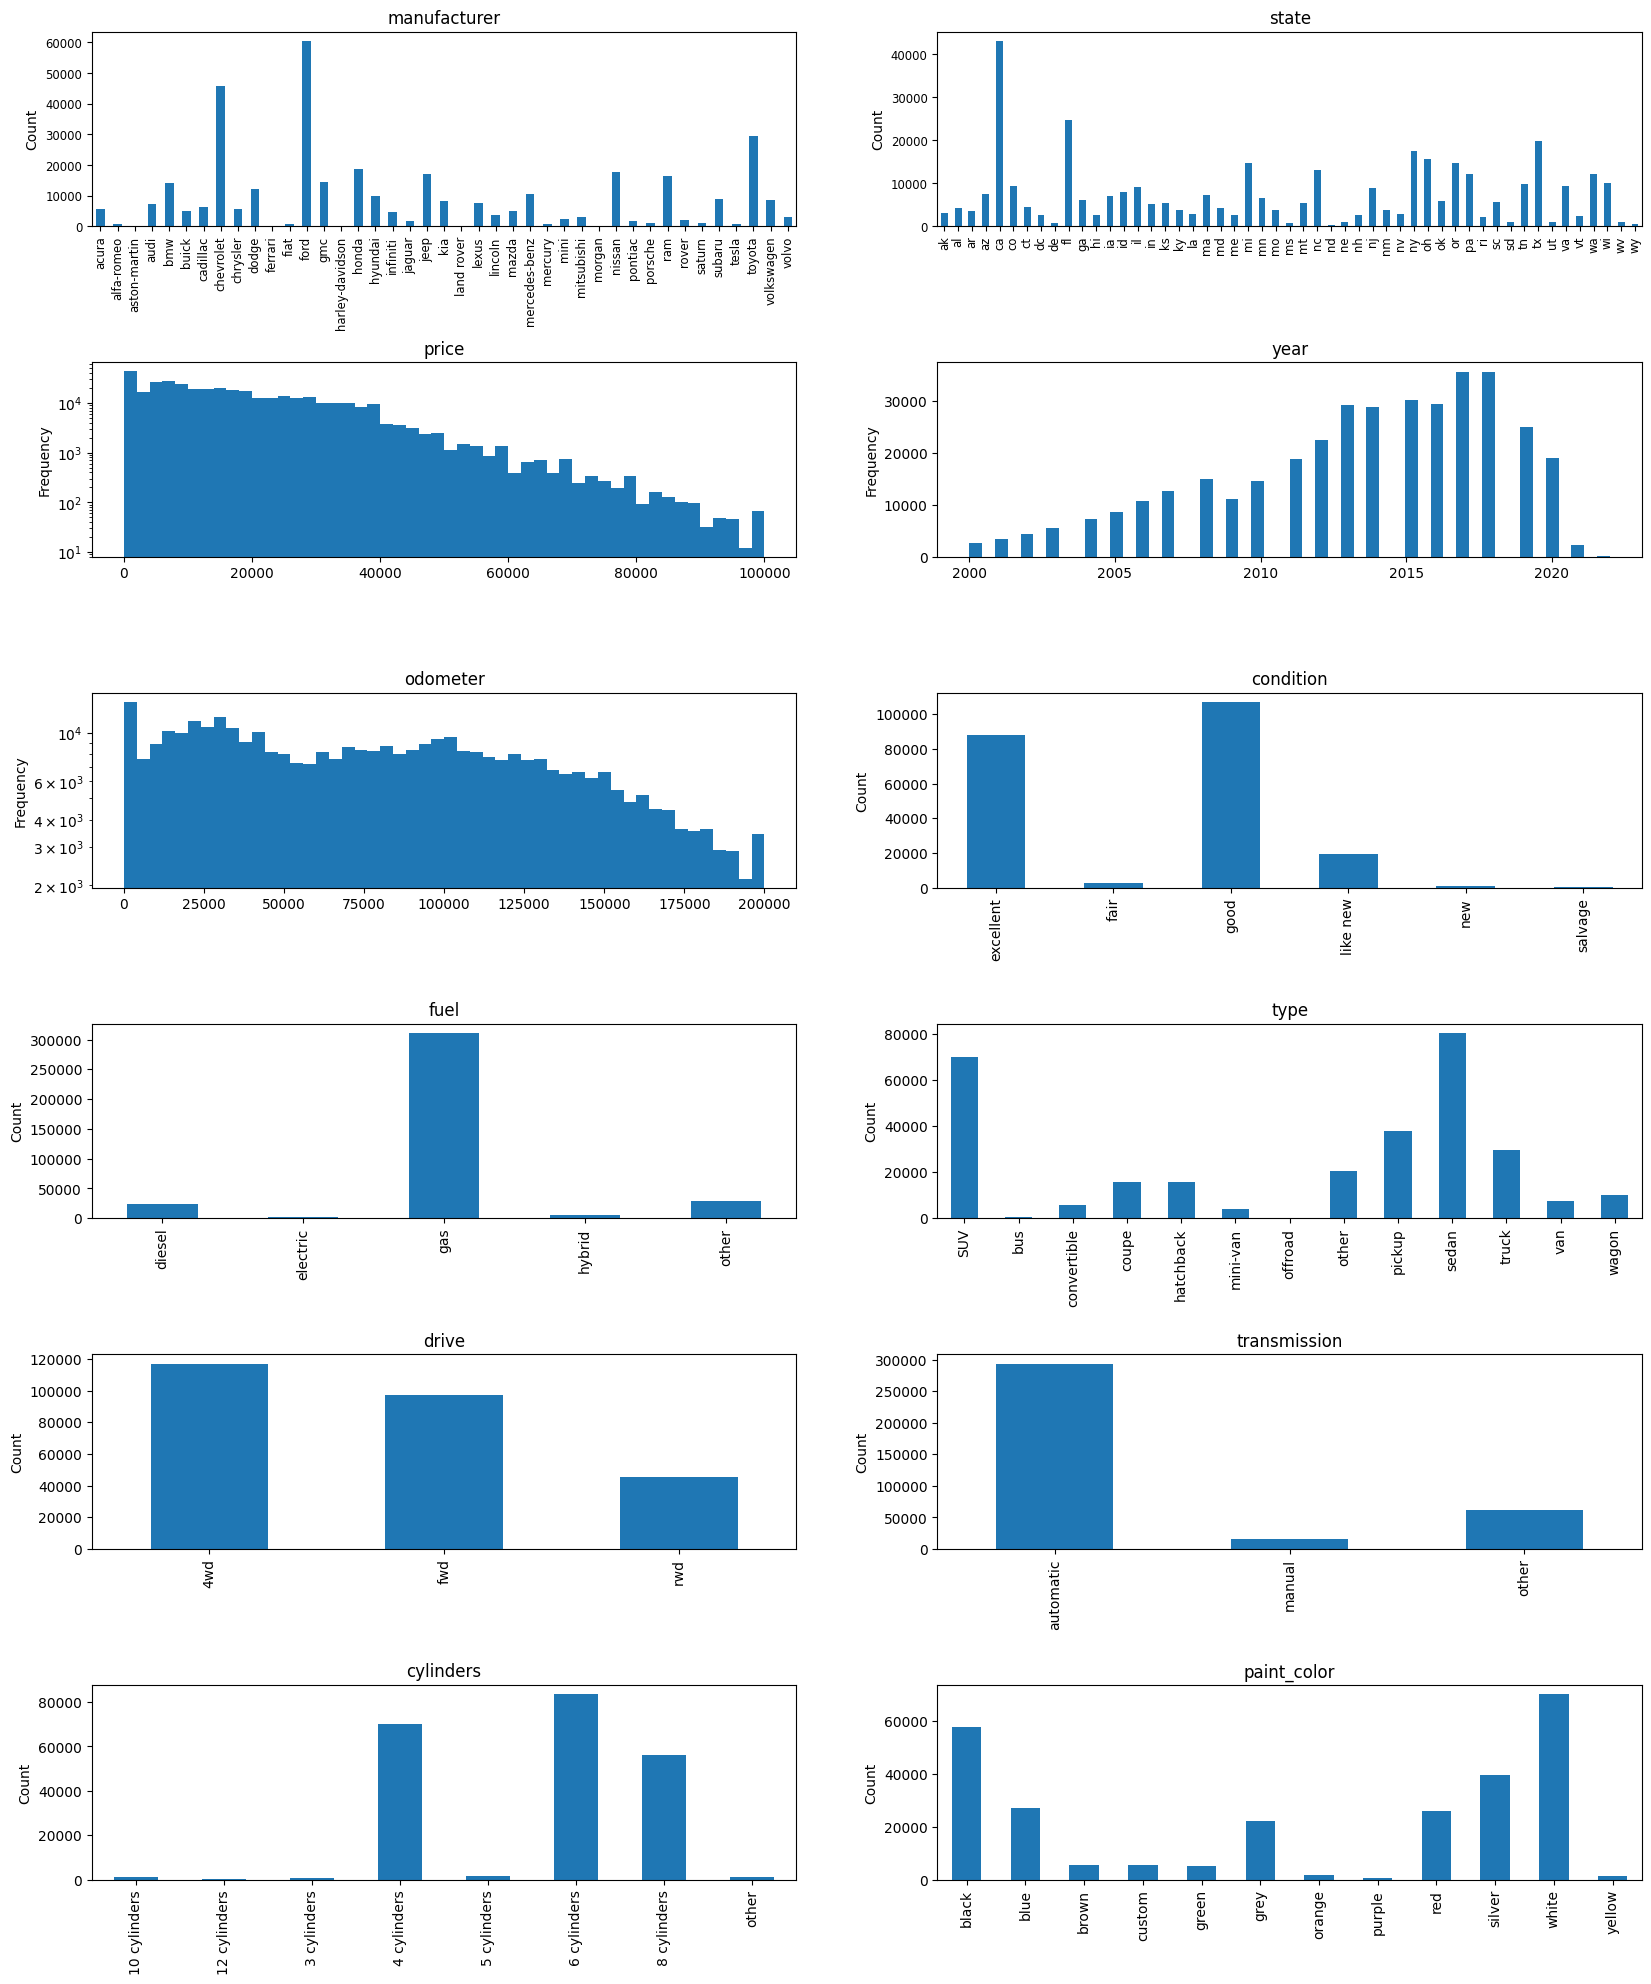

In [12]:
plot_univariate(
    df_uc, 
    columns=['manufacturer', 'state', 'price', 'year', 'odometer', 'condition', 'fuel', 'type', 'drive', 'transmission', 'cylinders', 'paint_color'], 
    log_dict={'price': True, 'odometer': True})

From the plot above we can see that the data contains used car prices from various manufacturers. The used cars have been offered in different states in the US and span across different model years. There is great variance across odometer which is one of the most important variables to reflect the residual value of a used car. In terms of price, there is a relatively high concentration of cars that have been offered at a price close to 0. Moving forward we drop samples with a price below 1,000 $ as these samples are not of interest in a residual value context.

In [13]:
df_uc = df_uc.loc[df_uc['price'] > 1000]

In the context of residual value risk management we aim at answering the following questions:
- Can we train a model that reliably predicts the residual value, i.e. the used-car price, given information about the vehicle (that is available at *inception* of the lease contract)?
- To what extent do residual values depend on macroeconomic conditions?

Translating these questions into a ML problem can be stated as follows:
- We want to predict vehicles' used car prices which is the **target variable** $y$ ...
- ... based on information about the vehicle and the macroeconomic features at time of remarketing which we call **features** $\bold{X}$ ...
- ... whereas the resulting model needs to fulfill a certain minimum level of prediction quality as measured by a scoring function on the prediction error $s\left(\epsilon
\right)$.
- Does a proxy for the macroeconomic condition such as GDP growth have a high feature importance, i.e. does it help in predicting the used car value?

In [14]:
df_uc.reset_index(drop=True, inplace=True)

In [15]:
# Target variable
y = df_uc['price']

In [16]:
# Features
X = df_uc.drop(columns=['price'])

#### Train-Test Split

In machine learning projects, splitting the dataset into **training** and **test** sets is a fundamental practice that serves several critical purposes.

**Reasons for Data Splitting**

1. **Model Evaluation**: The primary reason for splitting the data is to evaluate the performance of the machine learning model. The training set is used to train the model, while the test set is reserved for assessing how well the model generalizes to unseen data. This helps ensure that the model is not just memorizing the training data but can also make accurate predictions on new, unseen instances.

2. **Preventing Overfitting**: By keeping a separate test set, you can monitor and mitigate the risk of overfitting. Overfitting occurs when a model learns the noise and details of the training data to the extent that it negatively impacts its performance on new data. A model that performs well on the training set but poorly on the test set is likely overfitting. In section XXX, we will learn how we can use a technique called cross validation to prevent overfitting when training the model.


**Timing of the Split in the Data Pipeline**

Splitting the data into training and test sets is typically done at the very beginning of the data pipeline for several reasons:

- **Data Integrity**: Performing the split early ensures that the test set remains completely independent of the training process. This independence is crucial for obtaining an unbiased estimate of the model's performance.

- **Avoiding Data Leakage**: If the data is not split early, there is a risk of data leakage, where information from the test set inadvertently influences the training process. This can lead to overly optimistic performance metrics that do not reflect the model's true capabilities.

We split the data at random into training and tests sets using the `train_test_split()` method from the popular scikit-learn library that provides a wide range of ML algorithms and other convenience functions that are typically used in ML pipelines. We will keep 20% of the data aside in the test set. For reproducibility we set a seed via the `random_state` argument.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=333)

#### Handling Missing Values

Most ML models cannot deal with missing values. Therefore, we try to replace missing values with reasonable substitutes. This process is called data imputation. Often this is the preferred approach as compared to simply dropping samples with missing values as this would reduce the model's capability of learning patterns from the training data: Less observations, less patterns to learn.

In [19]:
X_train.isnull().sum()

region               0
year                 0
manufacturer      7169
model             2011
condition       101347
cylinders       111302
fuel              1601
odometer             0
transmission      1087
VIN              90247
drive            79740
type             51882
paint_color      73975
state                0
posting_date         0
dtype: int64

Most of the features have missing values. There are different imputation strategies and depending on the variable one or the other makes more sense.

##### year

For the model year domain knowledge helps us to define a great imputation approach. In fact, the 10th character of the vehicle identification
number (VIN) gives precise information on the vehicles model year.

<img src="img/vin.jpg" alt="VIN" width="750" height="500"/>
<p>Image source: <a href="https://www.autocheck.com/vehiclehistory/vin-basics">AutoCheck</a></p>

We import a dictionary that maps the 10th digit of the VIN to the model year. I have prepared this mapping dictionary in the [util.py](util.py) module.

In [20]:
from util import dict_vin2year

In [21]:
X_train.loc[X_train.year.isnull(), 'year'] = X_train.loc[X_train.year.isnull()].VIN.apply(lambda x: x[9]).map(dict_vin2year)

##### manufacturer

The same applies to the manufacturer. 2nd and 3rd character of the VIN give information about car manufacturer. Again, we use this information to impute the manufacturer column.

In [22]:
from util import dict_vin2manufacturer

In [23]:
X_train.loc[X_train.manufacturer.isnull() & X_train.VIN.notnull(), 'manufacturer'] = X_train.loc[X_train.manufacturer.isnull() & X_train.VIN.notnull()].VIN.apply(lambda x: x[0:3]).map(dict_vin2manufacturer)

##### model

A valid imputation strategy for categorical variables is to introduce a new category "unknown" as imputation of missing values. We follow this strategy for the model column using the `SimpleImputer` class of scikit-learn.

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
X_train[['model']] = SimpleImputer(strategy='constant', fill_value='unknown').fit_transform(X_train[['model']])

##### paint_color

We can use the `SimpleImputer` also to impute missing values with the most frequent value. We do so for the paint_color variable.

In [26]:
X_train[['paint_color']] = SimpleImputer(strategy='most_frequent').fit_transform(X_train[['paint_color']])

##### cylinders, fuel, transmission, drive, type

In [27]:
from util import ConditionalImputer
from tqdm import tqdm

In [28]:
columns_to_impute = ['cylinders', 'fuel', 'transmission', 'drive']

In [29]:
for column in tqdm(columns_to_impute):
    # Create a list of condition columns excluding the current target column
    relevant_cols = ['manufacturer', 'type'] + [column]
    
    # Impute the target column using the adjusted condition columns
    X_train[column] = ConditionalImputer(target_col=column, condition_cols=['manufacturer', 'type'], strategy='most_frequent').fit_transform(X_train[relevant_cols])

100%|██████████| 4/4 [02:48<00:00, 42.05s/it]


In [30]:
columns_to_impute = ['cylinders', 'fuel', 'transmission', 'drive', 'type']

In [31]:
for column in tqdm(columns_to_impute):
    # Create a list of condition columns excluding the current target column
    relevant_cols = ['manufacturer'] + [column]
    
    # Impute the target column using the adjusted condition columns
    X_train[column] = ConditionalImputer(target_col=column, condition_cols=['manufacturer'], strategy='most_frequent').fit_transform(X_train[relevant_cols])

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:14<00:00,  2.83s/it]


##### odometer

One intuitive imputation strategy for the odometer (miles driven with used car) is to assume that the older the car, the more miles have been driven on average. For this purpose we first calculate the age of the vehicle which is the time between model year and posting date.

In [32]:
X_train['age'] = X_train['posting_date'].dt.year - X_train['year']

We now impute the missing odometer with the most similar used cars in terms of vehicle age. For this purpose, we use scikit-learn's `KNNImputer` class.

In [33]:
from sklearn.impute import KNNImputer

In [34]:
X_train[['age', 'odometer']] = KNNImputer(n_neighbors=10).fit_transform(X_train[['age', 'odometer']])

The remaining observations with missing values are going to be dropped.

In [35]:
X_train = X_train.loc[X_train.drop(columns=['VIN', 'condition']).notnull().all(axis=1)]
y_train = y_train.loc[X_train.index]

In [36]:
X_train.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition       99550
cylinders           0
fuel                0
odometer            0
transmission        0
VIN             86985
drive               0
type                0
paint_color         0
state               0
posting_date        0
age                 0
dtype: int64

In [37]:
X_train.shape

(259935, 16)

We now have a clean training data set with 291,384 complete samples.

### Feature Engineering

#### Feature Selection

When selecting relevant features for training a machine learning model, it is crucial to consider whether the information about the feature will be available at the time of inference.

In a risk management context, we want to apply the machine learning model at the *beginning* of a lease contract to determine the lease rate based on the residual value prediction. This means that any information that becomes available only at the end of the leasing period cannot be used to train our model.

Considering the features we have, the following observations can be made:
- Typically, a lease company does not know exactly in which state or region its leased-out car will be sold at the end of the lease contract. However, if the lease company does not give the lessee the option to buy out the vehicle and plans its off-lease strategy in advance (i.e., how many off-lease units to sell in which geographical region), one could argue that information about the state or region is still known at the beginning of the lease contract.
- Age and odometer readings are not known exactly by the lease company at the beginning of the lease contract, but they can make reasonable assumptions about these features as the lease contracts determine the leasing period (age) and the maximum annual mileage (odometer).
- At the beginning of the lease contract, the leasing company does not know the final condition of the vehicle at the end of the leasing period.

With these considerations in mind, we drop 'condition' and 'region' from our feature set. Additionally, we drop the VIN as it is of little value for predicting the residual value of a car.

In [38]:
X_train = X_train.drop(columns=['condition', 'region', 'VIN'])

Further feature engineering typically involves creating new features from the data that can improve the model's predictive power. For example, above we have already created a new feature `age` from information of the manufacturing year and the date when the used car was posted on the sales platform.

In [39]:
X_train = X_train.drop(columns=['year', 'posting_date'])

Often special special equipment such as sport packages depreciate faster than the bare vehicles. We can use the model variable to retrieve information whether the vehicle is a "sports version"

In [40]:
X_train['sport'] = X_train['model'].apply(lambda x: 'sport' in x.lower()).astype(int)

In [41]:
X_train = X_train.drop(columns=['model'])

One could think of further feature engineering steps. For example, from the count of the VIN one could retrieve a good proxy for the number of owners the car already had. However, this is beyond the scope of the course.

#### Encoding Categorical Variables

Encoding categorical variables is important before training a machine learning model because most ML algorithms require numerical input and cannot directly handle categorical data. Encoding can be done using techniques such as one-hot encoding, where each category is converted into a binary vector. We do so by using the `OneHotEncoder` class from scikit-learn. 

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
# Step 1: Fit and transform the data
encoder = OneHotEncoder(
    sparse_output=False, 
    min_frequency=5, 
    handle_unknown='infrequent_if_exist').fit(X_train[['manufacturer', 'state', 'fuel', 'cylinders', 'paint_color', 'type', 'drive', 'transmission']])

# Transform the data
encoded_data = encoder.transform(X_train[['manufacturer', 'state', 'fuel', 'cylinders', 'paint_color', 'type', 'drive', 'transmission']])

# Step 2: Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Step 3: Concatenate the original DataFrame with the encoded DataFrame
X_train = pd.concat([X_train.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Step 4: Drop the original categorical columns if no longer needed
X_train.drop(columns=['manufacturer', 'state', 'fuel', 'cylinders', 'paint_color', 'type', 'drive', 'transmission'], inplace=True)

In [44]:
X_train.head(3)

,odometer,age,sport,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,type_sedan,type_truck,type_van,type_wagon,drive_4wd,drive_fwd,drive_rwd,transmission_automatic,transmission_manual,transmission_other
0,86000.00,8.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1,52159.00,2.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
2,107862.00,6.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00


### Model Training

A crucial step in the development of a ML model is that different algorithms have varying strengths and weaknesses, and selecting the most suitable one can significantly impact the model's performance and accuracy.

The number of algorithms for supervised learning tasks for regression is relatively wide spread. A good overview can be found [here](https://scikit-learn.org/stable/supervised_learning.html).

In this course we focus on tree-based models. The basic building block, also known as base learner, in a tree-based model is a Decision Tree.

#### Decision Tree

The decision logic of a decision tree involves the following steps:

- Splitting: The data is split into subsets based on the value of a feature. The goal is to find the feature and split point that best separate the data according to the target variable.
- Decision Rules: Each node in the tree represents a decision rule based on a feature. For example, "Is feature X greater than value Z?".
- Leaf Nodes: The terminal nodes (leaves) of the tree represent the prediction of the model. In regression, this is typically the mean value of the target variable of all samples that fall into the respective leaf.

**Decision Tree**:
> Decision Trees split the data into subsets based on the value of input features, creating a tree where each node represents a feature and each branch represents a decision rule.

In the following, we train a simple decision tree using `DecisionTreeRegressor` from scikit-learn. With the the arguments `max_depth` and `min_samples_split` we control the complexity of the final tree:
- `max_depth`: The maximum number of subsequent binary splits, i.e. how large the tree is allowed to get
- `min_samples_split`: The minimum number of samples that need to be in a terminal leaf

In [48]:
from sklearn import tree

In [53]:
base_learner = tree.DecisionTreeRegressor(max_depth=2, min_samples_leaf=1000).fit(X_train, y_train)

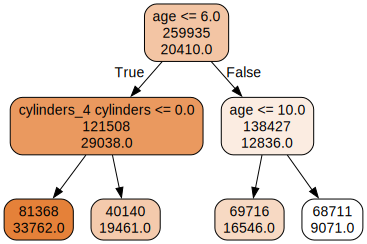

In [54]:
import graphviz
# Export the tree structure without squared error information
dot_data = tree.export_graphviz(
    base_learner, 
    out_file=None, 
    feature_names=X_train.columns,    
    filled=True, 
    rounded=True,  
    special_characters=False,
    node_ids=False,  # Disable node IDs
    proportion=False,  # Disable proportions
    impurity=False,  # Disable impurity (which includes squared error)
    leaves_parallel=True,
    precision=0,
    label='none'
)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)  
graph

From the visualization above, we can observe that the 259,935 training observations are initially divided based on the **age** of the vehicle. Used cars that are **6 years old or newer** move to the left in the decision tree, while those that are **older than 6 years** move to the right. Among the cars that are 6 years old or newer, those with **4-cylinder engines** have an average price of **$19,461**, whereas cars with other engine types average **$33,762**. For the cars older than 6 years, those that are **over 10 years old** have an average price of **$9,071**, while cars that are **between 6 and 10 years old** average **$16,546**.

This simple decision tree effectively partitions the data based on the features of the observations, resulting in distinct average prices in the terminal leaves, which highlights the impact of vehicle age and engine type on pricing. However, decision trees are often considered **weak learners** because they can easily overfit the training data, especially when they are deep, leading to models that may not generalize well to unseen data. Similarly, a **stump**, which is a decision tree with low depth as in the example above, is also a weak learner because it captures very limited information about the data, making it prone to high bias and low accuracy in predictions.

<img src="img/biasvariance.png" alt="Bias Variance Trade-off" width="750" height="500"/>
<p>Image source: <a href="https://scott.fortmann-roe.com/docs/BiasVariance.html">Scott Fortmann Roe</a></p>

#### Random Forest

A **Random Forest** is an ensemble learning method used for classification and regression tasks. It operates by constructing multiple decision trees during training and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees. The key characteristics of a Random Forest are:

- **Ensemble of Trees**: It builds a large number of decision trees (hence "forest") and merges their results to improve accuracy and control overfitting.
- **Bootstrap Aggregation (Bagging)**: Each tree is trained on a random subset of the training data, sampled with replacement (bootstrapping). This helps in reducing variance.
- **Random Feature Selection**: At each split in the tree, a random subset of features is considered for splitting, which helps in reducing correlation among the trees and improves model robustness.

Random Forests are known for their high accuracy, ability to handle large datasets with higher dimensionality, and robustness to overfitting.

### Model Evaluation

### Model Fine Tuning

### Model Deployment